## Import packages

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV
from evolutionary_search import EvolutionaryAlgorithmSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
from sklearn.ensemble import AdaBoostRegressor

## Step I. Load data

In [3]:
train = pd.read_csv('train.csv')
X_test = pd.read_csv('X_test.csv')

X_train = train.iloc[:, :-1]
y_train = train.iloc[:, -1]

## Step II. Build the model and perform parameter tuning

In [4]:
def modelfit(clf, train, target, performCV=True, cv=10, printFeatureImportance=True):
    clf.fit(train, target)
    pred = clf.predict(train)
    train_r2_score = r2_score(target, pred)
    
    print('\nModel Report')
    print('Train_coef_of_det: %0.6f' %(train_r2_score))
    
    if performCV:
        cv_r2_score = cross_val_score(clf, train, target, cv=cv, scoring='r2', n_jobs=-1)
        print('CV_coef_of_det: Mean-%0.6f | Std-%0.6f | Min-%0.6f | Max-%0.6f' %(np.mean(cv_r2_score),
            np.std(cv_r2_score), np.min(cv_r2_score), np.max(cv_r2_score)))
        
    if printFeatureImportance:
        feat_imp = pd.Series(clf.feature_importances_, 
                             index=train.columns.to_series().tolist()).sort_values(ascending=False)
        rcParams['figure.figsize'] = 20, 6
        feat_imp.plot(kind='bar')
        plt.title('Feature importance')
        plt.xlabel('Features')
        plt.ylabel('Importance')
        plt.show()        

### Baseline model

In [5]:
params = {}
grid = GridSearchCV(estimator=AdaBoostRegressor(), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.805196074191


In [6]:
params = {}
grid = GridSearchCV(estimator=AdaBoostRegressor(base_estimator=None, n_estimators=50, learning_rate=1.0,
        loss='linear', random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.805122489733


### Grid search

In [7]:
params = {}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=1.0, n_estimators=50, loss='linear', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.805122489733


In [8]:
params = {'n_estimators': range(10,200,10)}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=1.0, n_estimators=50, loss='linear', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 60}
0.806917059383


In [9]:
params = {'n_estimators': range(60,1200,40)}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=1.0, n_estimators=50, loss='linear', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 60}
0.806917059383


In [10]:
params = {'n_estimators': range(54,66)}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=1.0, n_estimators=50, loss='linear', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 59}
0.807711530962


In [12]:
params = {'loss': ['linear', 'square', 'exponential']}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=1.0, n_estimators=59, loss='linear', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'loss': 'exponential'}
0.808009258242


In [13]:
params = {'n_estimators': range(50,550,50)}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=1.5, n_estimators=59, loss='exponential', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 50}
0.803702830293


In [14]:
params = {'n_estimators': range(50,550,50)}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=0.1, n_estimators=59, loss='exponential', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 500}
0.817261240187


In [15]:
params = {'n_estimators': range(500,1050,50)}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=0.1, n_estimators=59, loss='exponential', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 550}
0.817277080726


In [16]:
params = {'n_estimators': range(500,610,10)}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=0.1, n_estimators=59, loss='exponential', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 520}
0.817435198979


In [17]:
params = {'loss': ['linear', 'square', 'exponential']}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=0.1, n_estimators=520, loss='exponential', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'loss': 'exponential'}
0.817435198979


In [18]:
params = {'n_estimators': range(100,1500,100)}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=0.01, n_estimators=520, loss='exponential', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 1400}
0.79984689349


In [19]:
params = {'n_estimators': range(1500,9000,200)}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=0.01, n_estimators=520, loss='exponential', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{'n_estimators': 5100}
0.816366675434


### Final model

In [20]:
params = {}
grid = GridSearchCV(estimator=AdaBoostRegressor(learning_rate=0.1, n_estimators=520, loss='exponential', 
        base_estimator=None, random_state=10), param_grid=params, cv=10, scoring='r2', n_jobs=-1)
grid.fit(X_train, y_train)
print grid.best_params_
print grid.best_score_

{}
0.817435198979



Model Report
Train_coef_of_det: 0.875528
CV_coef_of_det: Mean-0.817435 | Std-0.031769 | Min-0.742407 | Max-0.866257


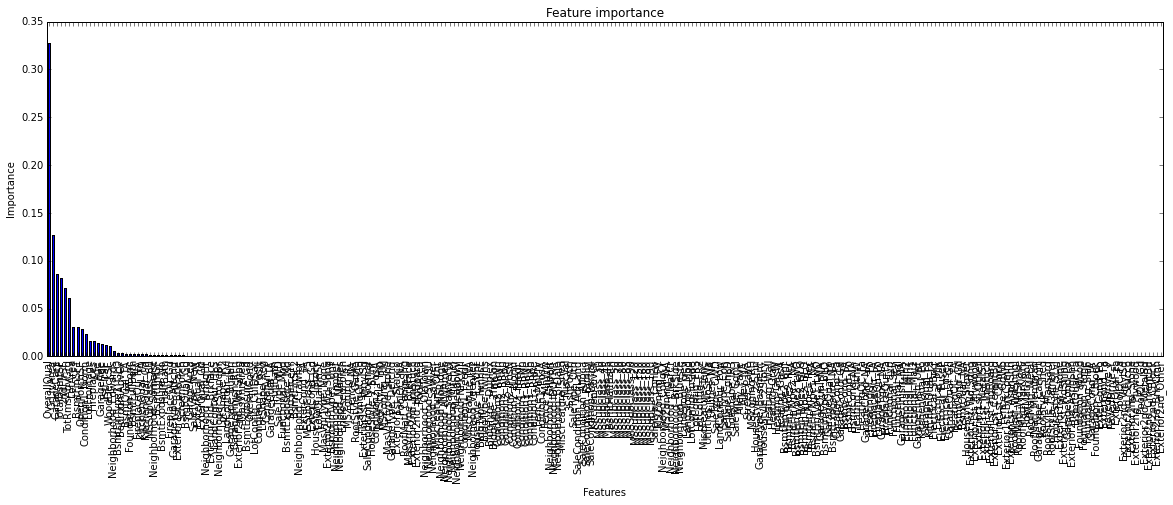

In [21]:
reg1 = AdaBoostRegressor(learning_rate=0.1, n_estimators=520, loss='exponential', 
        base_estimator=None, random_state=10)
modelfit(reg1, X_train, y_train)

### Random search

In [ ]:
params = {
          'learning_rate': [1.0,0.1],
          'n_estimators': range(10,700),
          'loss': ['linear','square','exponential'],
          'base_estimator': [None],
          'random_state': [10]
         }
rand = RandomizedSearchCV(estimator=AdaBoostRegressor(), param_distributions=params, cv=10, scoring='r2',
         n_iter=1000, random_state=10, n_jobs=-1)
rand.fit(X_train, y_train)
print 'Best parameters: \n', rand.best_params_
print '\tBest score: ', rand.best_score_

In [ ]:
params = {}
reg1 = AdaBoostRegressor(
                        learning_rate = params['learning_rate'],
                        n_estimators = params['n_estimators'],
                        loss = params['loss'],
                        base_estimator = params['base_estimator'],
                        random_state = params['random_state']
                        )
modelfit(reg1, X_train, y_train)

### Bayesian optimization: 'hyperopt' package

In [22]:
min_score = float('inf')
best_params = ''
c = 0

def score(params):
    global c, min_score, best_params
    c += 1
    print "Interation no.: ", c
    print "Training with params : "
    print params
    reg = AdaBoostRegressor(
                            learning_rate = params['learning_rate'],
                            n_estimators = params['n_estimators'],
                            loss = params['loss'],
                            base_estimator = params['base_estimator'],
                            random_state = params['random_state']
                            )
    cv_r2_score = cross_val_score(reg, X_train, y_train, cv=10, scoring='r2', n_jobs=-1)
    score = 1 - np.mean(cv_r2_score) 
    if score < min_score:
        min_score = score
        best_params = params     
    print "\tScore: {0}".format(1-score)
    print "\tBest score: {0}\n".format(1-min_score)
    return {'loss': score, 'status': STATUS_OK}

def optimize():
    space = {
              'learning_rate': hp.choice('learning_rate', [1.0,0.1]),
              'n_estimators': hp.choice('n_estimators', range(10,700)),
              'loss': hp.choice('loss', ['linear','square','exponential']),
              'base_estimator': hp.choice('base_estimator', [None]),
              'random_state': hp.choice('random_state', [10])        
             }
    best = fmin(score, space, algo=tpe.suggest, max_evals=1000)    
  
optimize()
print 'Best parameters:'
print best_params
print "\tScore {0}".format(1-min_score)

Interation no.:  1
Training with params : 
{'n_estimators': 411, 'loss': 'linear', 'base_estimator': None, 'random_state': 10, 'learning_rate': 1.0}
	Score: 0.793566642251
	Best score: 0.793566642251

Interation no.:  2
Training with params : 
{'n_estimators': 116, 'loss': 'square', 'base_estimator': None, 'random_state': 10, 'learning_rate': 0.1}
	Score: 0.789066097686
	Best score: 0.793566642251

Interation no.:  3
Training with params : 
{'n_estimators': 397, 'loss': 'square', 'base_estimator': None, 'random_state': 10, 'learning_rate': 0.1}
	Score: 0.806090993398
	Best score: 0.806090993398

Interation no.:  4
Training with params : 
{'n_estimators': 166, 'loss': 'square', 'base_estimator': None, 'random_state': 10, 'learning_rate': 1.0}
	Score: 0.785367898653
	Best score: 0.806090993398

Interation no.:  5
Training with params : 
{'n_estimators': 535, 'loss': 'exponential', 'base_estimator': None, 'random_state': 10, 'learning_rate': 0.1}
	Score: 0.817115699852
	Best score: 0.8171


Model Report
Train_coef_of_det: 0.875895
CV_coef_of_det: Mean-0.817549 | Std-0.031679 | Min-0.742375 | Max-0.866206


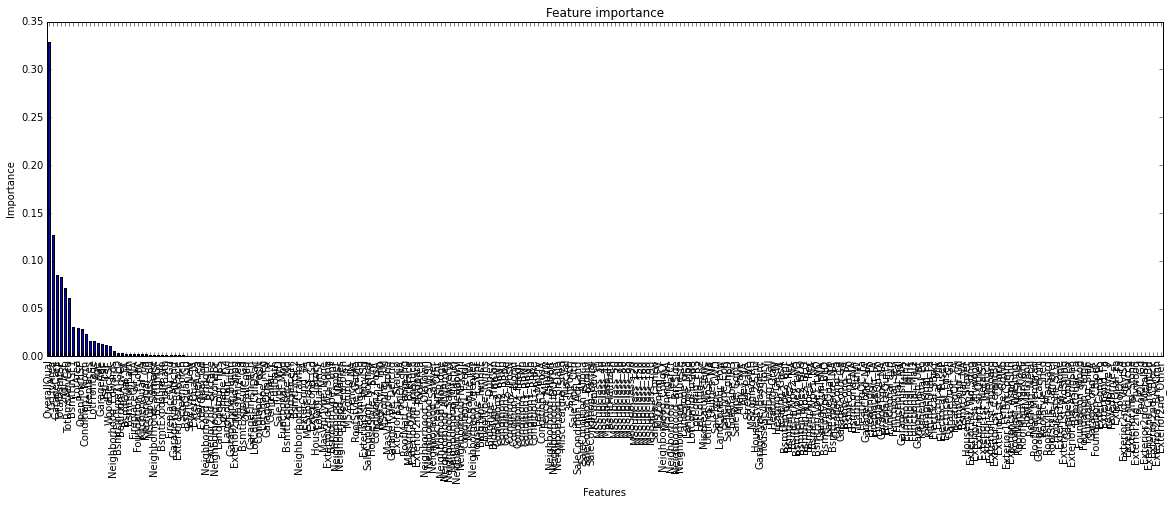

In [23]:
params = {'n_estimators': 517, 'loss': 'exponential', 'base_estimator': None, 'random_state': 10,
          'learning_rate': 0.1}
reg1 = AdaBoostRegressor(
                        learning_rate = params['learning_rate'],
                        n_estimators = params['n_estimators'],
                        loss = params['loss'],
                        base_estimator = params['base_estimator'],
                        random_state = params['random_state']
                        )
modelfit(reg1, X_train, y_train)

### Genetic programming: 'sklearn-deap' package

In [ ]:
params = {
          'learning_rate': [1.0,0.1],
          'n_estimators': range(10,700),
          'loss': ['linear','square','exponential'],
          'base_estimator': [None],
          'random_state': [10]
         }
evol = EvolutionaryAlgorithmSearchCV(estimator=AdaBoostRegressor(), params=params, cv=10,
        scoring='r2', population_size=50, gene_mutation_prob=0.1, gene_crossover_prob=0.5, tournament_size=3,
        generations_number=10, verbose=True, n_jobs=-1)
evol.fit(X_train, y_train)

In [ ]:
params = {}
reg1 = AdaBoostRegressor(
                        learning_rate = params['learning_rate'],
                        n_estimators = params['n_estimators'],
                        loss = params['loss'],
                        base_estimator = params['base_estimator'],
                        random_state = params['random_state']
                        )
modelfit(reg1, X_train, y_train)

### Make predictions and save results

In [17]:
test_pred = reg1.predict(X_test)
dictn = {'Id': range(1461,2920), 'SalePrice': test_pred}
res = pd.DataFrame(dictn)
res.to_csv('submission.csv', index=0)